# Tutorial: Bayes' Law

In this problem, we'll work through a simple application of Bayes' Law, both analytically and numerically (on a grid).

You will learn to:

* use conjugacy relations to find an analytic form for a posterior
* compute a posterior on a grid (brute force)
* apply Bayes law to incorporate new data

In [1]:
TutorialName = 'bayes_law'
exec(open('tbc.py').read()) # define TBC and TBC_above
import numpy as np
import scipy.stats as st
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline

## Background

We'll re-examine the first example in the [Generative Models tutorial](generative_models.ipynb). We're interested in knowing what fraction, $f$, of galaxy clusters in the Universe are morphologically relaxed (hence relatively close to equilibrium). We can think of $f$ equivalently as the a priori probability that a randomly chosen, or newly discovered, cluster is relaxed.

From X-ray imaging of 361 clusters, which we will assume are representative, 57 were found to be morphologically relaxed according to our metric. We will use this information to constrain $f$. Our data could be laboriously written as

$X_1,X_2,\ldots,X_{361}$,

where 57 $X$'s are 1 (relaxed) and 304 are 0 (unrelaxed). Equivalently we can just speak of $s=57$ "successes" out of $n=361$ trials. Let's go ahead and put that into code:

In [2]:
data = {'n':361, 's':57}

Thus, we write Bayes' Law for this application as

$p(f|s) = \frac{p(f)P(s|f)}{P(s)}$.

First, as always, we choose a prior. Clearly, by definition, $0\leq f \leq 1$. Without thinking too hard about it, let's take $p(f)$ to be uniform over this interval.

As the problem is defined, the sampling distribution, $P(s|f)$, is binomial:

$P(s|f) = {n \choose s} f^s (1-f)^{n-s}$.

## Solution and implementation

It's always nice to have a simple, analytic way of expressing our solution, and this problem happens to provide one. Consult [the Wikipedia](https://en.wikipedia.org/wiki/Conjugate_prior) to see whether this sampling distribution has a conjugate prior and determine whether that conjugate distribution can be used to express the uniform prior chosen above. (Note: it does, and it can.) Find the parameters of the conjugate prior that reproduce the uniform distribution on [0,1].

> The conjugate form of the prior is $f \sim \ldots$

> This is equivalent to $f \sim \mathrm{Uniform}(0,1)$ for prior hyperparameters ...

In [ ]:
TBC()

Before continuing on, prove the conjugacy relation that you looked up above. Multiply $p(f)$ and $P(s|f)$, and simplify until you obtain a normalized posterior distribution expressed in a standard form. Note that you are allowed to multiply by any constants you want - by definition whatever constant you need to multiply by to produce a normalized PDF must be $1/P(s)$.

> $p(f) \, P(s|f) = \ldots$ what you claimed above

In [ ]:
TBC()

### Prior

Fill in the cells below to provide the function that evaluates the prior (you can call the `scipy.stats` implementation of the distribution, or spell out the density) and define prior hyperparameter values that make the prior uniform.

In [22]:
import scipy
def prior(f, **prior_params):
    # return the prior density evaluated at x, p(f)
    rv=scipy.stats.beta(prior_params['a'], prior_params['b'])
    return rv.pdf(f)

In [23]:
# Parameters that make the prior equivalent to Uniform(0,1), in a dictionary (as with data, above),
# Make the dictionry keys the names of the parameter arguments to "prior", so we can pass it **prior_params.
prior_params = {'a':1,'b':1}

Excellent! Let's now plot the prior with your chosen parameters, to verify that it's the same as a uniform distribution.

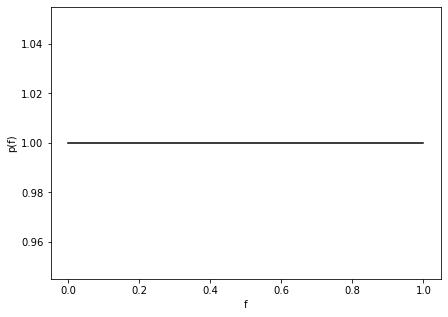

In [24]:
fgrid = np.linspace(0.0, 1.0, 500)

plt.rcParams['figure.figsize'] = (7.0, 5.0)
plt.plot(fgrid, prior(fgrid, **prior_params), 'k-');
plt.xlabel('f');
plt.ylabel('p(f)');

### Likelihood

Next, code up the likelihood function. Recall that this is just the sampling distribution evaluated as a function of the model parameters, with the data fixed.

In [25]:
# here f would be our model paramter, and s and n would be from our data dictionary
import scipy
def likelihood(f, s, n):
    return scipy.special.binom(n, s)*(f**s)*((1-f)**(n-s))

Again, let's take a look.

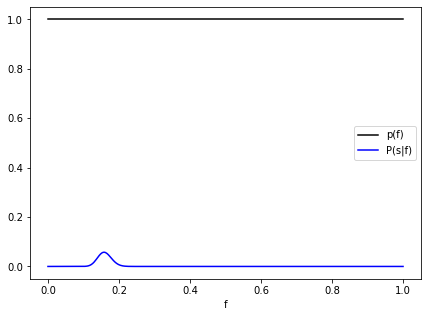

In [26]:
plt.rcParams['figure.figsize'] = (7.0, 5.0)
plt.plot(fgrid, prior(fgrid, **prior_params), 'k-', label='p(f)');
plt.plot(fgrid, likelihood(fgrid, **data), 'b-', label='P(s|f)');
plt.xlabel('f');
plt.legend();

Hold on! You didn't (necessarily) make a mistake. Remember that the likelihood function is not a PDF - it is not normalized over $f$ for a given $s$. So there is no reason the normalizations of the two curves above should be comparable.

In fact, run the cell below to numerically verify that $P(s|f)$ is **not** normalized over $f$.

In [27]:
fgrid = np.linspace(0.0, 1.0, 500)
print('This does NOT need to be 1.0:', np.trapz(likelihood(fgrid, **data), x=fgrid))

This does NOT need to be 1.0: 0.0027624309392252377


On the other hand, in its guise as the sampling distribution, it _is_ normalized over $s$ for a given $f$. Verify this for the arbitrary choice of $f$ below, or some other value(s) of your choice.

In [28]:
sgrid = np.arange(0.0, data['n']+1)

test_f = np.pi/10.0
print('This had better be exactly 1.0 (to within numerical error):', likelihood(test_f, sgrid, data['n']).sum())

This had better be exactly 1.0 (to within numerical error): 0.9999999999998627


Just for fun, here is what $P(s|f)$ looks like as a function of $s$ (i.e. as a sampling distribution) for a few different $f$'s.

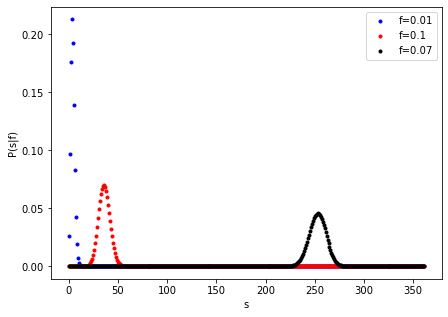

In [29]:
plt.rcParams['figure.figsize'] = (7.0, 5.0)
plt.plot(sgrid, likelihood(0.01, sgrid, data['n']), 'b.', label='f=0.01');
plt.plot(sgrid, likelihood(0.1, sgrid, data['n']), 'r.', label='f=0.1');
plt.plot(sgrid, likelihood(0.7, sgrid, data['n']), 'k.', label='f=0.07');
plt.xlabel('s');
plt.ylabel('P(s|f)');
plt.legend();

### Posterior

Moving on, code up the posterior distribution. Since its functional form is the same as that of the prior, we can go ahead and use the same Python function. Then all we need is a function that determines the posterior distribution's parameters given the prior and data.

In [43]:
posterior = prior # you can have this one

def get_post_params(n,s):
    return {'a':s+prior_params['a'],'b':n-s+prior_params['b']}

See what this looks like:

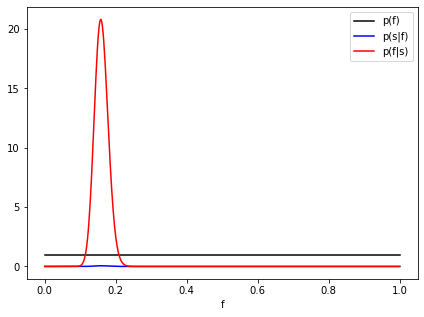

In [44]:
post_params = get_post_params(data['n'],data['s'])

plt.rcParams['figure.figsize'] = (7.0, 5.0)
plt.plot(fgrid, prior(fgrid, **prior_params), 'k-', label='p(f)');
plt.plot(fgrid, likelihood(fgrid, **data), 'b-', label='p(s|f)');
plt.plot(fgrid, posterior(fgrid, **post_params), 'r-', label='p(f|s)');
plt.xlabel('f');
plt.legend();

### Comparison with brute force

Just to drive the point home, let's imagine we didn't recognize this problem as conjugate. Evaluate the posterior over `fgrid` by brute force (i.e. multiplying the likelihood and prior), and we'll compare. Don't forget to normalize.

In [63]:
post_fgrid = likelihood(fgrid, **data)*prior(fgrid, **prior_params)*360

Plot it along with the conjugate solution:

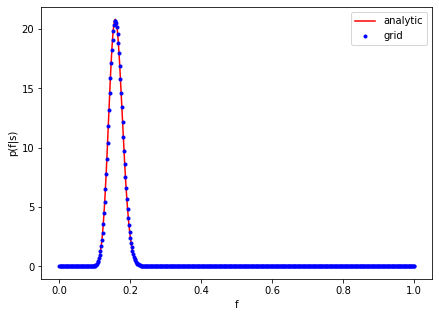

In [64]:
plt.rcParams['figure.figsize'] = (7.0, 5.0)
plt.plot(fgrid, posterior(fgrid, **post_params), 'r-', label='analytic');
plt.plot(fgrid, post_fgrid, 'b.', label='grid');
plt.xlabel('f');
plt.ylabel('p(f|s)');
plt.legend();

You might be thinking that all this messing around with conjugacy relations is silly, and in this simple case, which takes very little time to evaluate numerically, that's fair enough. While conjugacy doesn't apply to every problem, there are a few reasons it's worth knowing about for those times that it is a viable strategy:
1. Since the posterior has a well known functional form, we instantly know its mean, median, mode, variance, skewness, kurtosis, etc., etc., etc. to arbitrary precision - things that we might be interested in that would be more annoying to estimate numerically. They are simple functions of the distribution's parameters that we can look up.
2. When dealing with multi-parameter distributions and/or large amounts of data, leaping straight to the final answer (after, at most, some linear algebra) can sometimes represent a significant speed-up over more brute-force methods. 

## Summarizing the constraint on $f$

While the posterior for $f$, evaluated one of the ways above, in principle is the entire answer, we normally want to summarize the constraint in terms of a best value and an interval. You'll see more about this in the Credible Region [notes](../notes/credible_regions.ipynb) and [tutorial](credible_intervals.ipynb). For now, we'll go ahead and summarize the constraint according to one convention for doing so.

Write a function that finds the median, 15.85th percentile and 84.15th percentile of the posterior distribution for $f$. Do this based on the parameters of the conjugate posterior, which will let you take advantage of `scipy` functions (e.g. `scipy.stats.<distribution>.median`).

In [65]:
def summarize_posterior(post_params):
    # Find the 50th, 15.85th and 84.15th percentiles of the posterior distribution.
    # Return these as a numpy array with shape (3,), in that order.
    a=scipy.stats.beta.median(post_params['a'],post_params['b'])
    b=scipy.stats.beta.ppf(0.1585,post_params['a'],post_params['b'])
    c=scipy.stats.beta.ppf(0.8415,post_params['a'],post_params['b'])
    result=np.array([a,b,c])
    return result

Compare what you found with this pre-computed solution.

In [68]:
print('My best fit and interval:', summarize_posterior(post_params))
print("Should be pretty much zeros:", summarize_posterior(post_params) - np.loadtxt('bayeslaw.dat'))

My best fit and interval: [0.15915445 0.14056871 0.17899446]
Should be pretty much zeros: [0.00000000e+00 2.77555756e-17 0.00000000e+00]


## Updating with new data

Suppose we get more data:

In [69]:
data2 = {'n':200, 's':40}

Use your `get_post_params` function to compute the posterior parameters for
1. the second data set combined with the original prior (not using the first data set), and
2. the combination of both data sets and the original prior.

In [70]:
n2,s2=data2['n'],data2['s']
n1,s1=data['n'],data['s']
post_params_2 = {'a':s2+prior_params['a'],'b':n2-s2+prior_params['b']}
post_params_both = {'a':s1+s2+prior_params['a'],'b':n1-s1+n2-s2+prior_params['b']}

Here's how the posteriors from the individual data sets compare with the prior:

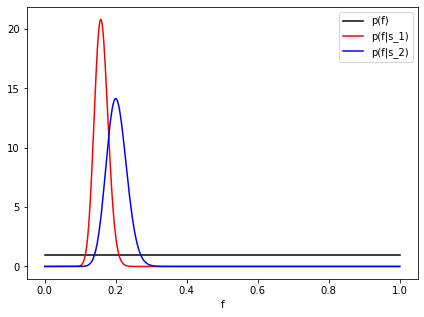

In [71]:
plt.rcParams['figure.figsize'] = (7.0, 5.0)
plt.plot(fgrid, prior(fgrid, **prior_params), 'k-', label='p(f)');
plt.plot(fgrid, posterior(fgrid, **post_params), 'r-', label='p(f|s_1)');
plt.plot(fgrid, posterior(fgrid, **post_params_2), 'b-', label='p(f|s_2)');
plt.xlabel('f');
plt.legend();

This visualizes the accumulation of data as we add first one and then the second data set to the prior information:

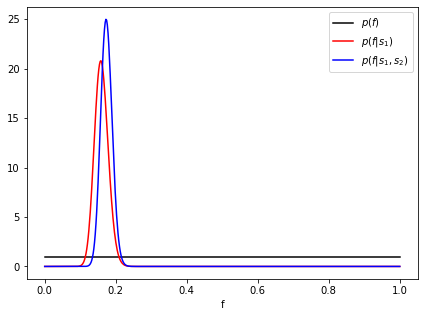

In [72]:
plt.rcParams['figure.figsize'] = (7.0, 5.0)
plt.plot(fgrid, prior(fgrid, **prior_params), 'k-', label=r'$p(f)$');
plt.plot(fgrid, posterior(fgrid, **post_params), 'r-', label=r'$p(f|s_1)$');
plt.plot(fgrid, posterior(fgrid, **post_params_both), 'b-', label=r'$p(f|s_1,s_2)$');
plt.xlabel('f');
plt.legend();

Finally, compare the constraints:

In [73]:
print('Just data1:', summarize_posterior(post_params))
print('Just data2:', summarize_posterior(post_params_2))
print('Both data1 and data2', summarize_posterior(post_params_both))

Just data1: [0.15915445 0.14056871 0.17899446]
Just data2: [0.2019887  0.1747084  0.23124104]
Both data1 and data2 [0.1736814  0.15809221 0.19004469]


## Check the goodness of fit

Because we have absorbed the pointed lessons in the notes so well, we will finish by comparing posterior predictions of the fitted model with the data. That is, we want to make sure that the model, for the posterior distribution we've ended up with, could plausibly have produced the observed data. We'll use the posterior as updated by `data2` above, i.e. parametrized by `post_params_both`. Because the binomial distribution is additive (for the same $f$ parameter), we can compare this with the combined data:

In [74]:
data_both = {'n':data['n']+data2['n'], 's':data['s']+data2['s']}

What we want to do in this case is predict the distribution of $s'$ marginalized over the posterior distribution of $f$, where $s'$ represents an equivalent measurement to $s$ (i.e. from the same total number $n$, but obviously not actually the same clusters). In other words, we should compute

$P(s'|s) = \int df p(f|s) \, P(s'|f)$

and see how plausible $s$ is compared with this PDF.

In conjugate problems, this posterior predictive distribution is often _also_ a standard PDF that can be arrived at analytically (it's on the Wikipedia page above it you want to add a comparison below), but let's instead go through a procedure that will work more generally. Namely, just like in the [Bayes' Law notes](../notes/bayes_law.ipynb), we will use the generative model as, well, a generative model, and produce a list of potential data $s'$ from an equally long list of values of $f$ drawn from the posterior distribution. Fill in the code below (you can use `scipy.stats.<distribution>.rvs` functions to generate random numbers from a PDF).

In [ ]:
Npredict = 10000
TBC()
# f_from_posterior = ...
# s_post_predicted = ...

Below we compare this distribution to the measured $s$:

In [ ]:
plt.hist(s_post_predicted, density=True, label='your samples', bins=20);
plt.axvline(x=data_both['s'], label='measured s', color='C1')
plt.xlabel(r'$s\prime$', fontsize='x-large');
plt.ylabel(r'$P(s\prime|s)$', fontsize='x-large');
plt.legend(fontsize='x-large');

It should look very consistent. Of course, this was an extremely simple model - is it even possible for us to get a "bad fit" where the distribution of $s'$ does not comfortably include $s$? The only circumstance I can think of where that would happen is if `data` and `data2` had not come from the same model, that is if they had been generated by significantly different values of $f$ somehow. Then we might see the distribution above being less consistent or inconsistent with the value of $s$ in `data_both`, and conclude that our model with a single $f$ doesn't adequately describe all the data. We would hopefully also be able to identify the issue when comparing the two individual posteriors above. We'll cover more quantitative ways to define "consistency" later on, but for now we have a simple, visual check of how acceptable the fit is.